In [49]:
import arviz as az
import numpy as np
import pymc as pm
import pytensor.tensor as pt
from matplotlib import pyplot
import scipy.stats as st
import scipy.signal
import scipy.integrate
import pandas
import openpyxl
import json
import math
import timeit
import peak_performance as pp

In [30]:
# determine exemplary frequency of data points based on experimental data
time = np.fromfile(fr"./His110 test data/A1_t1_1_Part2_His110_M0_m0_time.npy")
# calculate mean of first difference of time
s = pandas.Series(time)
time_between_points = np.mean(list(s.diff())[1:])
num_data_points = int(np.ptp(time) / time_between_points)

##### Simulated data without a baseline

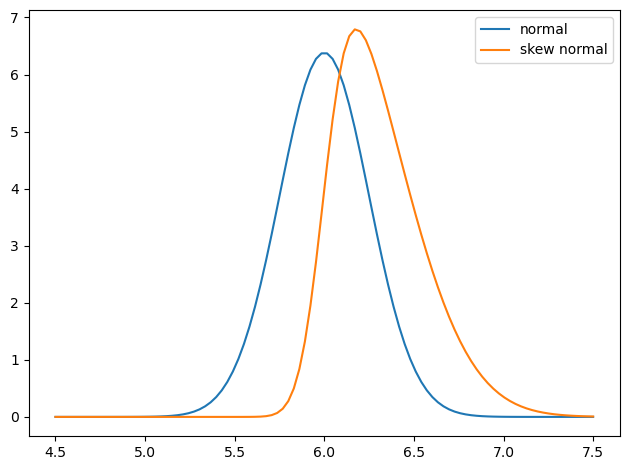

In [32]:
x = np.linspace(4.5, 7.5, num_data_points)
y_skew = st.skewnorm.pdf(x, 3.5, loc=6, scale=0.4) * 4
y = st.norm.pdf(x, loc=6, scale=0.25) * 4
pyplot.plot(x, y, label="normal")
pyplot.plot(x, y_skew, label="skew normal")
pyplot.legend()
pyplot.tight_layout()
pyplot.show()

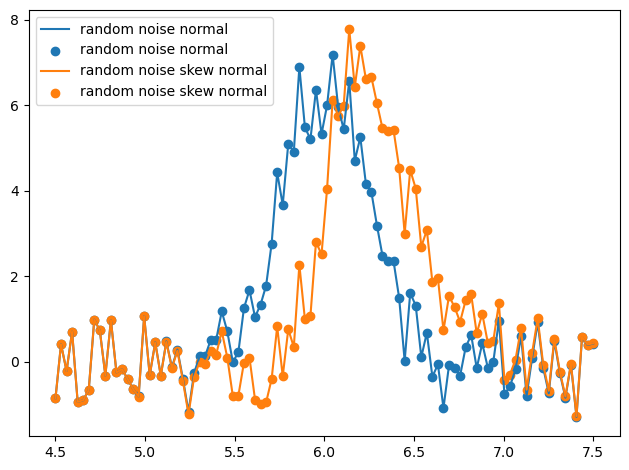

In [35]:
# adding normally distributed noise
normal_noise = np.random.normal(0, 0.6, size=x.shape)
# adding random noise
random_noise = np.random.random(x.shape)

noisy_y_skew = y_skew + normal_noise
noisy_y = y + normal_noise
pyplot.plot(x, noisy_y, label="random noise normal")
pyplot.scatter(x, noisy_y, label="random noise normal")
pyplot.plot(x, noisy_y_skew, label="random noise skew normal")
pyplot.scatter(x, noisy_y_skew, label="random noise skew normal")
pyplot.legend()
pyplot.tight_layout()
pyplot.show()

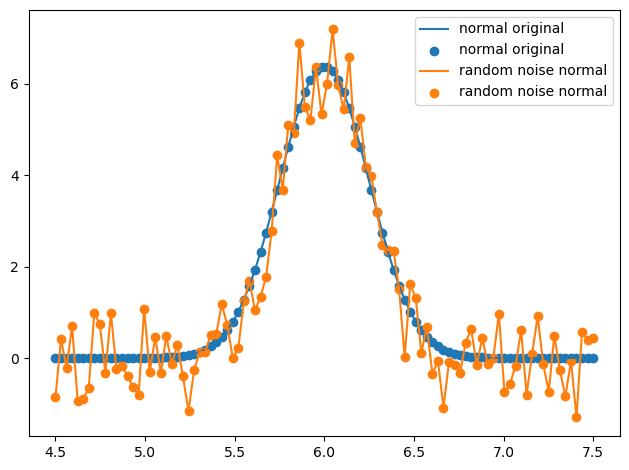

In [37]:
pyplot.plot(x, y, label="normal original")
pyplot.scatter(x, y, label="normal original")
pyplot.plot(x, noisy_y, label="random noise normal")
pyplot.scatter(x, noisy_y, label="random noise normal")
pyplot.legend()
pyplot.tight_layout()
pyplot.show()

##### Simulated data with a linear baseline

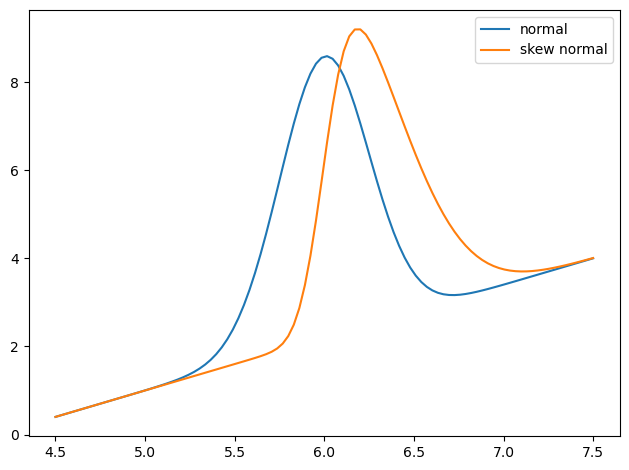

In [44]:
baseline = 1.2 * x - 5
y_skew = st.skewnorm.pdf(x, 3.5, loc=6, scale=0.4) * 4 + baseline
y = st.norm.pdf(x, loc=6, scale=0.25) * 4 + baseline
pyplot.plot(x, y, label="normal")
pyplot.plot(x, y_skew, label="skew normal")
pyplot.legend()
pyplot.tight_layout()
pyplot.show()

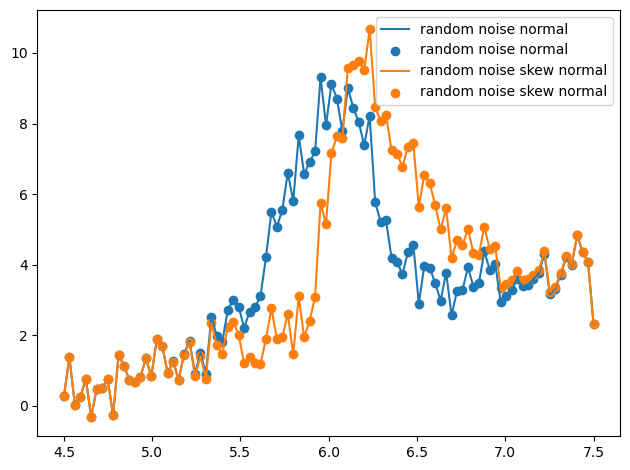

In [48]:
# adding normally distributed noise
normal_noise = np.random.normal(0, 0.6, size=x.shape)
# adding random noise
random_noise = np.random.random(x.shape)

noisy_y_skew = y_skew + normal_noise
noisy_y = y + normal_noise
pyplot.plot(x, noisy_y, label="random noise normal")
pyplot.scatter(x, noisy_y, label="random noise normal")
pyplot.plot(x, noisy_y_skew, label="random noise skew normal")
pyplot.scatter(x, noisy_y_skew, label="random noise skew normal")
pyplot.legend()
pyplot.tight_layout()
pyplot.show()

In [ ]:
pp.models